In [3]:
import torch

%load_ext autoreload
%autoreload 2

print("Torch version:", torch.__version__)

Torch version: 1.13.0a0+d0d6b1f


In [4]:
from utils.mnist_preprocessing import *
from torchvision import transforms

# parameters
size_of_batch = 128

# dataset preparation
train_set_gray = DatasetMNIST(root='./data',
                       env='train',
                       color=False,
                       transform= transforms.Compose([transforms.ToTensor()]))

val_set_gray = DatasetMNIST(root='./data',
                       env='val',
                       color=False,
                       transform= transforms.Compose([transforms.ToTensor()]))

test_set_gray = DatasetMNIST(root='./data',
                       env='test',
                       color=False,
                       transform= transforms.Compose([transforms.ToTensor()]))

train_set_color = DatasetMNIST(root='./data',
                       env='train',
                       color=True,
                       transform= transforms.Compose([transforms.ToTensor()]))

val_set_color = DatasetMNIST(root='./data',
                       env='val',
                       color=True,
                       transform= transforms.Compose([transforms.ToTensor()]))

test_set_color = DatasetMNIST(root='./data',
                       env='test',
                       color=True,
                       transform= transforms.Compose([transforms.ToTensor()]))

# dataloaders
train_loader_gray = torch.utils.data.DataLoader(dataset=train_set_gray,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

val_loader_gray = torch.utils.data.DataLoader(dataset=val_set_gray,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

test_loader_gray = torch.utils.data.DataLoader(dataset=test_set_gray,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

train_loader_color = torch.utils.data.DataLoader(dataset=train_set_color,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

val_loader_color = torch.utils.data.DataLoader(dataset=val_set_color,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

test_loader_color = torch.utils.data.DataLoader(dataset=test_set_color,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)


MNIST dataset already exists
MNIST dataset already exists
MNIST dataset already exists
MNIST dataset already exists
MNIST dataset already exists
MNIST dataset already exists


## Choosing a model

In [8]:
open_clip.list_models()

['RN50',
 'RN50-quickgelu',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'RN101',
 'RN101-quickgelu',
 'roberta-ViT-B-32',
 'timm-convnext_base',
 'timm-convnext_large',
 'timm-convnext_xlarge',
 'timm-efficientnetv2_rw_s',
 'timm-resnetaa50d',
 'timm-swin_base_patch4_window7_224',
 'timm-vit_medium_patch16_gap_256',
 'timm-vit_relpos_medium_patch16_cls_224',
 'ViT-B-16',
 'ViT-B-16-plus',
 'ViT-B-16-plus-240',
 'ViT-B-32',
 'ViT-B-32-plus-256',
 'ViT-B-32-quickgelu',
 'ViT-e-14',
 'ViT-G-14',
 'ViT-g-14',
 'ViT-H-14',
 'ViT-H-16',
 'ViT-L-14',
 'ViT-L-14-280',
 'ViT-L-14-336',
 'ViT-L-16',
 'ViT-L-16-320',
 'ViT-M-16',
 'ViT-M-16-alt',
 'ViT-M-32',
 'ViT-M-32-alt',
 'ViT-S-16',
 'ViT-S-16-alt',
 'ViT-S-32',
 'ViT-S-32-alt']

In [9]:
open_clip.list_pretrained()

[('RN50', 'openai'),
 ('RN50', 'yfcc15m'),
 ('RN50', 'cc12m'),
 ('RN50-quickgelu', 'openai'),
 ('RN50-quickgelu', 'yfcc15m'),
 ('RN50-quickgelu', 'cc12m'),
 ('RN101', 'openai'),
 ('RN101', 'yfcc15m'),
 ('RN101-quickgelu', 'openai'),
 ('RN101-quickgelu', 'yfcc15m'),
 ('RN50x4', 'openai'),
 ('RN50x16', 'openai'),
 ('RN50x64', 'openai'),
 ('ViT-B-32', 'openai'),
 ('ViT-B-32', 'laion400m_e31'),
 ('ViT-B-32', 'laion400m_e32'),
 ('ViT-B-32', 'laion2b_e16'),
 ('ViT-B-32', 'laion2b_s34b_b79k'),
 ('ViT-B-32-quickgelu', 'openai'),
 ('ViT-B-32-quickgelu', 'laion400m_e31'),
 ('ViT-B-32-quickgelu', 'laion400m_e32'),
 ('ViT-B-16', 'openai'),
 ('ViT-B-16', 'laion400m_e31'),
 ('ViT-B-16', 'laion400m_e32'),
 ('ViT-B-16-plus-240', 'laion400m_e31'),
 ('ViT-B-16-plus-240', 'laion400m_e32'),
 ('ViT-L-14', 'openai'),
 ('ViT-L-14', 'laion400m_e31'),
 ('ViT-L-14', 'laion400m_e32'),
 ('ViT-L-14', 'laion2b_s32b_b82k'),
 ('ViT-L-14-336', 'openai'),
 ('ViT-H-14', 'laion2b_s32b_b79k'),
 ('ViT-g-14', 'laion2b_s12b_

In [14]:
import open_clip

# [('RN50', 'openai'),
#  ('RN50', 'yfcc15m'),
#  ('RN50', 'cc12m'
model, _, preprocess = open_clip.create_model_and_transforms('RN50', pretrained='cc12m')
model.cuda().eval()

# performances (https://github.com/mlfoundations/open_clip)
# Below are checkpoints of models trained on YFCC-15M, along with their zero-shot top-1 accuracies
# on ImageNet and ImageNetV2. These models were trained using 8 GPUs and the same hyperparameters
# described in the "Sample running code" section, with the exception of lr=5e-4 and epochs=32.
# For YFCC-15M: -> https://github.com/mlfoundations/open_clip
# ResNet-50 (32.7% / 27.9%)
# ResNet-101 (34.8% / 30.0%)
# For CC12M: -> https://github.com/google-research-datasets/conceptual-12m
# ResNet-50 (36.45%)

# there is a 400m image/text dataset, but open_clip uses the visiontransformers on these:
# https://laion.ai/blog/laion-400-open-dataset/

# performance of original clip model:
# This is a key change: by not directly optimizing for the benchmark, we show that it becomes much more
# representative: our system closes this “robustness gap” by up to 75% while matching the performance of
# the original ResNet-507 on ImageNet zero-shot without using any of the original 1.28M labeled examples.
# https://openai.com/blog/clip/
# imagenet resnet101: 76.2%
# clip VIT-L: 76.2%
# imagenet V2 resnet101: 64.3%
# clip VIT-L V2: 70.1%

# We use the 12 datasets from the well-studied evaluation
# suite introduced by (Kornblith et al., 2019) and add 15
# additional datasets in order to assess the performance of
# models on a wider variety of distributions and tasks. These
# datasets include MNIST, the Facial Expression Recognition
# 2013 dataset (Goodfellow et al., 2015), STL-10 (Coates
# et al., 2011), EuroSAT (Helber et al., 2019), the NWPURESISC45 dataset (Cheng et al., 2017), the German Traffic Sign Recognition Benchmark (GTSRB) dataset (Stallkamp et al., 2011), the KITTI dataset (Geiger et al., 2012),
# PatchCamelyon (Veeling et al., 2018), the UCF101 action
# recognition dataset (Soomro et al., 2012), Kinetics 700 (Carreira et al., 2019), 2,500 random samples of the CLEVR
# dataset (Johnson et al., 2017), the Hateful Memes dataset
# (Kiela et al., 2020), and the ImageNet-1k dataset (Deng
# et al., 2012). 

# clip paper (page 40)
# clip-RN50 on mnist: 98.3%
# clip-RN50 on imagenet: 73.3%
# RN50 on mnist: 98.3%
# RN50 on imagenet: 74.3%

# clip paper zero-shot performance (page 43)
# clip-ResNet RN50 on mnist: 66.6%
# clip-ResNet RN50 on imagenet: 59.6%

CLIP(
  (visual): ModifiedResNet(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act2): ReLU(inplace=True)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act3): ReLU(inplace=True)
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (

## Test performance of the clip model on the mnist dataset

In [15]:
# images in skimage to use and their textual descriptions

# Results in:
# Training accuracy:  33.85%
# Validation accuracy:  36.16%
# Test accuracy:  34.16%
descriptions1 = {
    "0": "a number with the value zero",
    "1": "a number with the value one",
    "2": "a number with the value two",
    "3": "a number with the value three",
    "4": "a number with the value four",
    "5": "a number with the value five",
    "6": "a number with the value six",
    "7": "a number with the value seven",
    "8": "a number with the value eight",
    "9": "a number with the value nine"
}

# Results in:
# Training accuracy:  33.85%
# Validation accuracy:  36.16%
# Test accuracy:  34.16%
descriptions2 = {
    "0": 'a photo of the number: "0".',
    "1": 'a photo of the number: "1".',
    "2": 'a photo of the number: "2".',
    "3": 'a photo of the number: "3".',
    "4": 'a photo of the number: "4".',
    "5": 'a photo of the number: "5".',
    "6": 'a photo of the number: "6".',
    "7": 'a photo of the number: "7".',
    "8": 'a photo of the number: "8".',
    "9": 'a photo of the number: "9".',
}

descriptions3 = {
    "0": '0',
    "1": '1',
    "2": '2',
    "3": '3',
    "4": '4',
    "5": '5',
    "6": '6',
    "7": '7',
    "8": '8',
    "9": '9',
}

descriptions4 = {
    "0": 'zero',
    "1": 'one',
    "2": 'two',
    "3": 'three',
    "4": 'four',
    "5": 'five',
    "6": 'six',
    "7": 'seven',
    "8": 'eight',
    "9": 'nine',
}

descriptions = descriptions4

In [16]:
from utils.clip_utils import *

# len(=nr_of_batches)*batch_size=nr_of_samples
# len(val_loader)-1 full batches with a size of 128 images
# one last batch with the remaining <128 images
#(len(val_loader)-1) * 128 + 16 

asses_clip_performance(model, preprocess, train_loader_gray, descriptions, dataset_name="Training gray")
asses_clip_performance(model, preprocess, val_loader_gray, descriptions, dataset_name="Validation gray")
asses_clip_performance(model, preprocess, test_loader_gray, descriptions, dataset_name="Test gray")

Training gray accuracy: 11.482%
Validation gray accuracy: 11.37%
Test gray accuracy: 11.4%


In [17]:
asses_clip_performance(model, preprocess, train_loader_color, descriptions, dataset_name="Training color")
asses_clip_performance(model, preprocess, val_loader_color, descriptions, dataset_name="Validation color")
asses_clip_performance(model, preprocess, test_loader_color, descriptions, dataset_name="Test color")

Training color accuracy: 8.17%
Validation color accuracy: 7.84%
Test color accuracy: 8.95%


## Sample random examples from dataset

In [18]:
from utils.mnist_preprocessing import *
from utils.mnist_plotting import *

In [19]:
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch

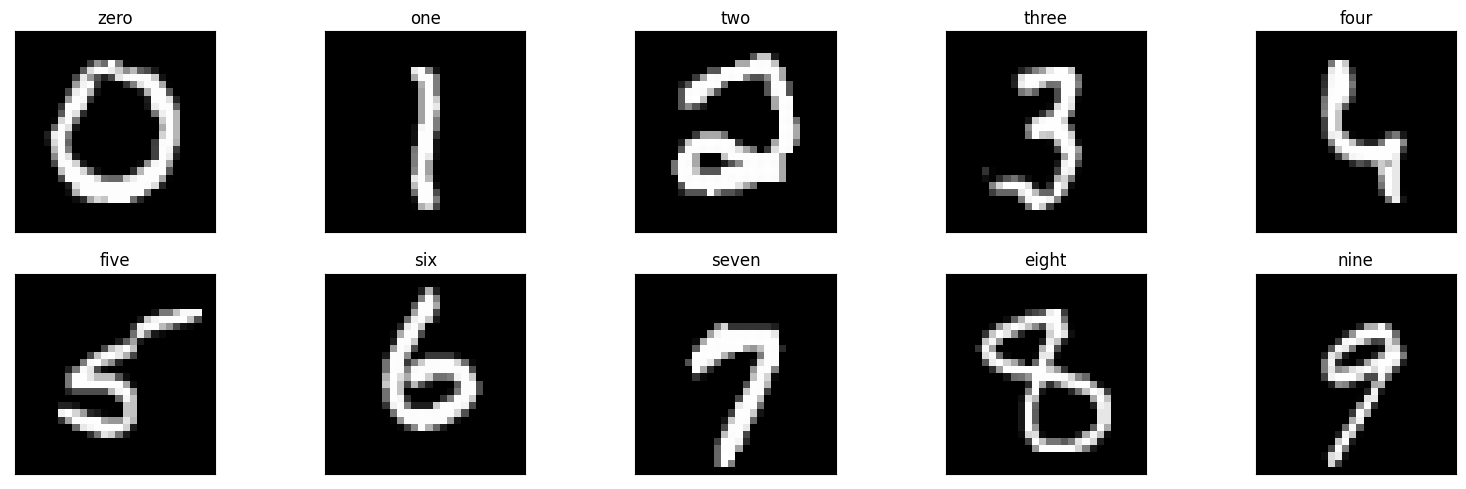

In [20]:
from utils.mnist_general import *

original_gray_images, gray_images, texts = show_examples_0_to_9(val_set_gray, preprocess, descriptions)

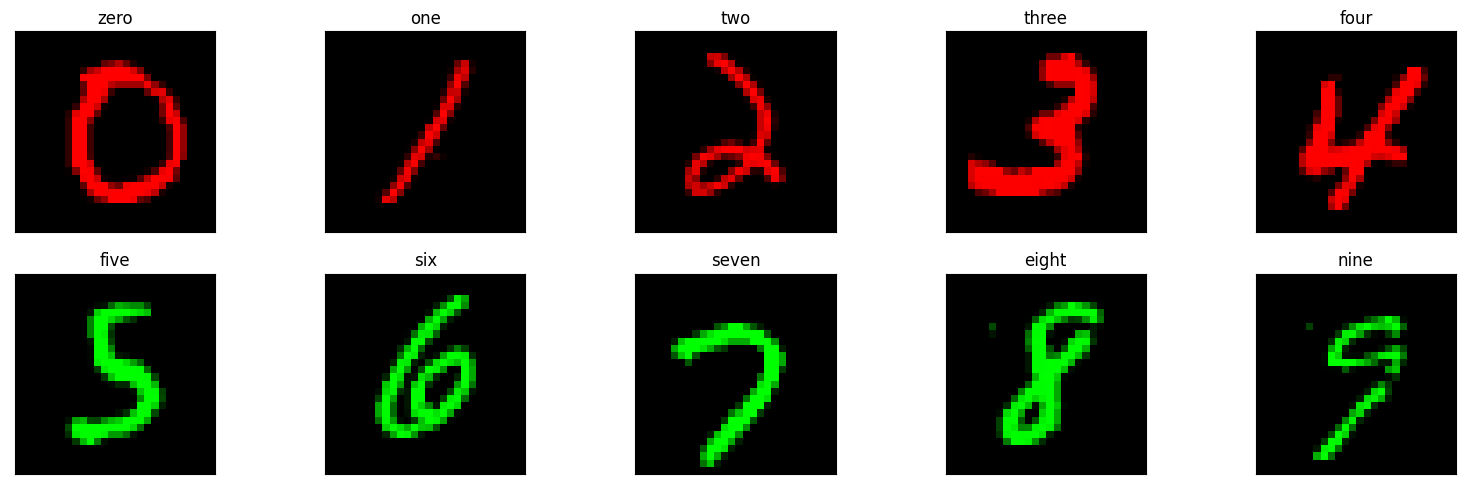

In [21]:
from utils.mnist_general import *

original_color_images, color_images, texts = show_examples_0_to_9(val_set_color, preprocess, descriptions)

## Compute similarities

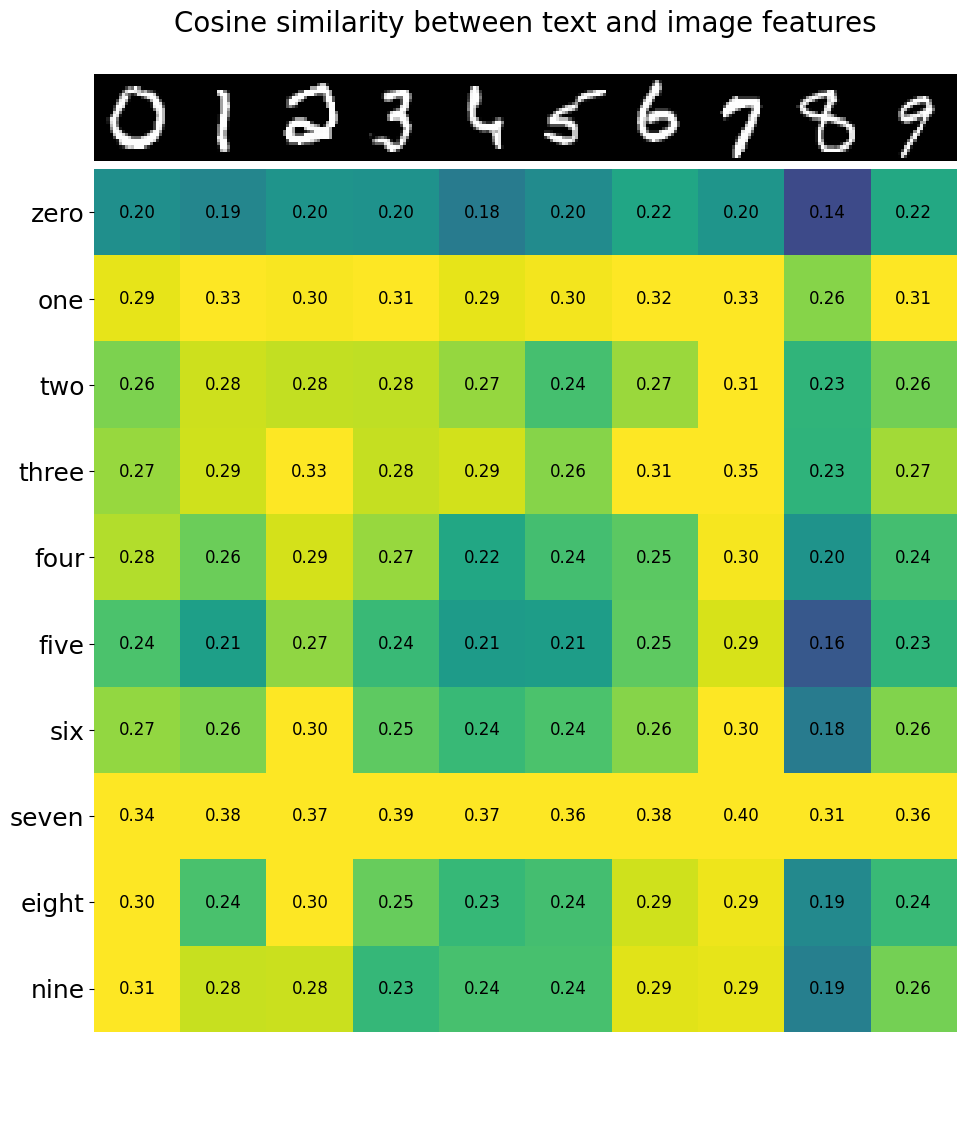

In [22]:
from utils.clip_utils import *

similarity = clip_inference(model, gray_images, texts)
show_cosine_similarities(similarity.cpu(), original_gray_images, texts)

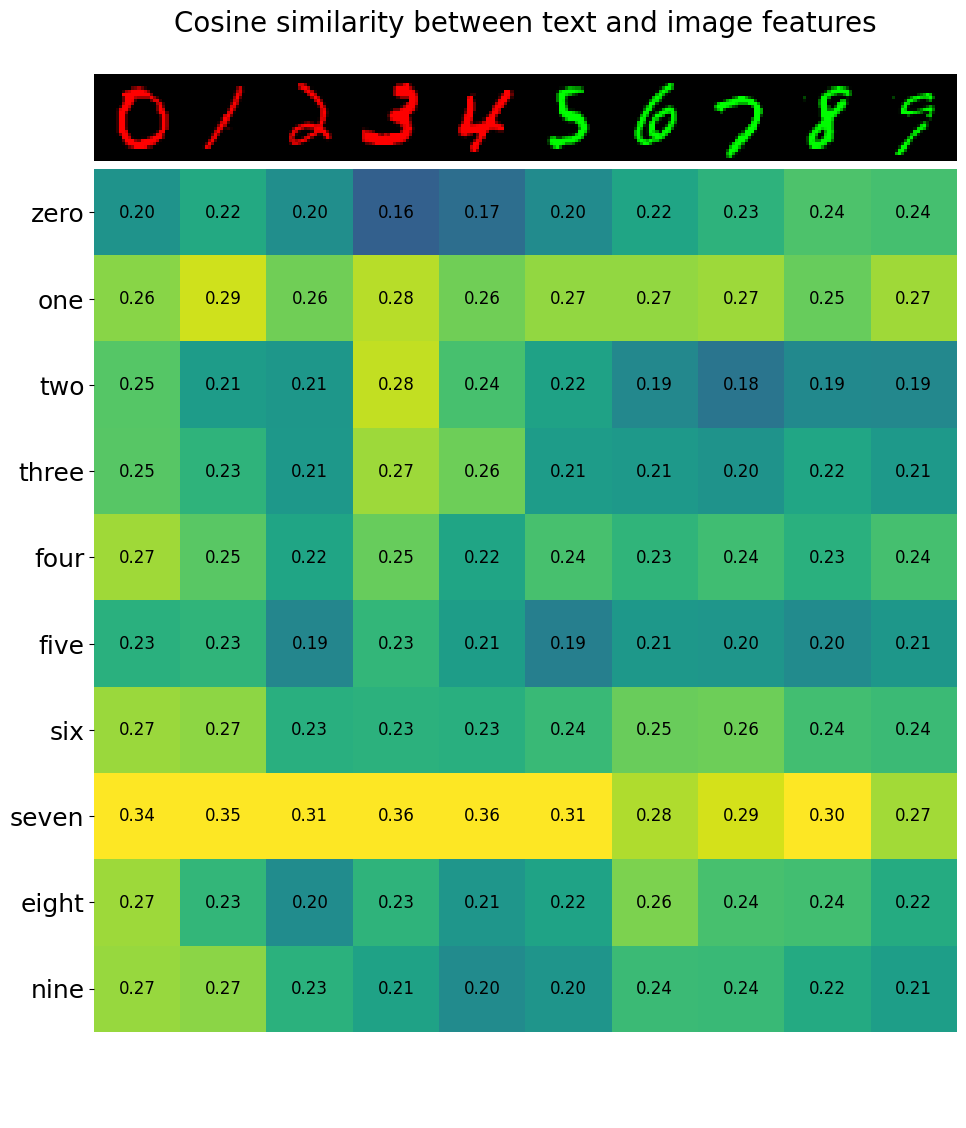

In [23]:
from utils.clip_utils import *

similarity = clip_inference(model, color_images, texts)
show_cosine_similarities(similarity.cpu(), original_color_images, texts)

## Inspect top-k performance

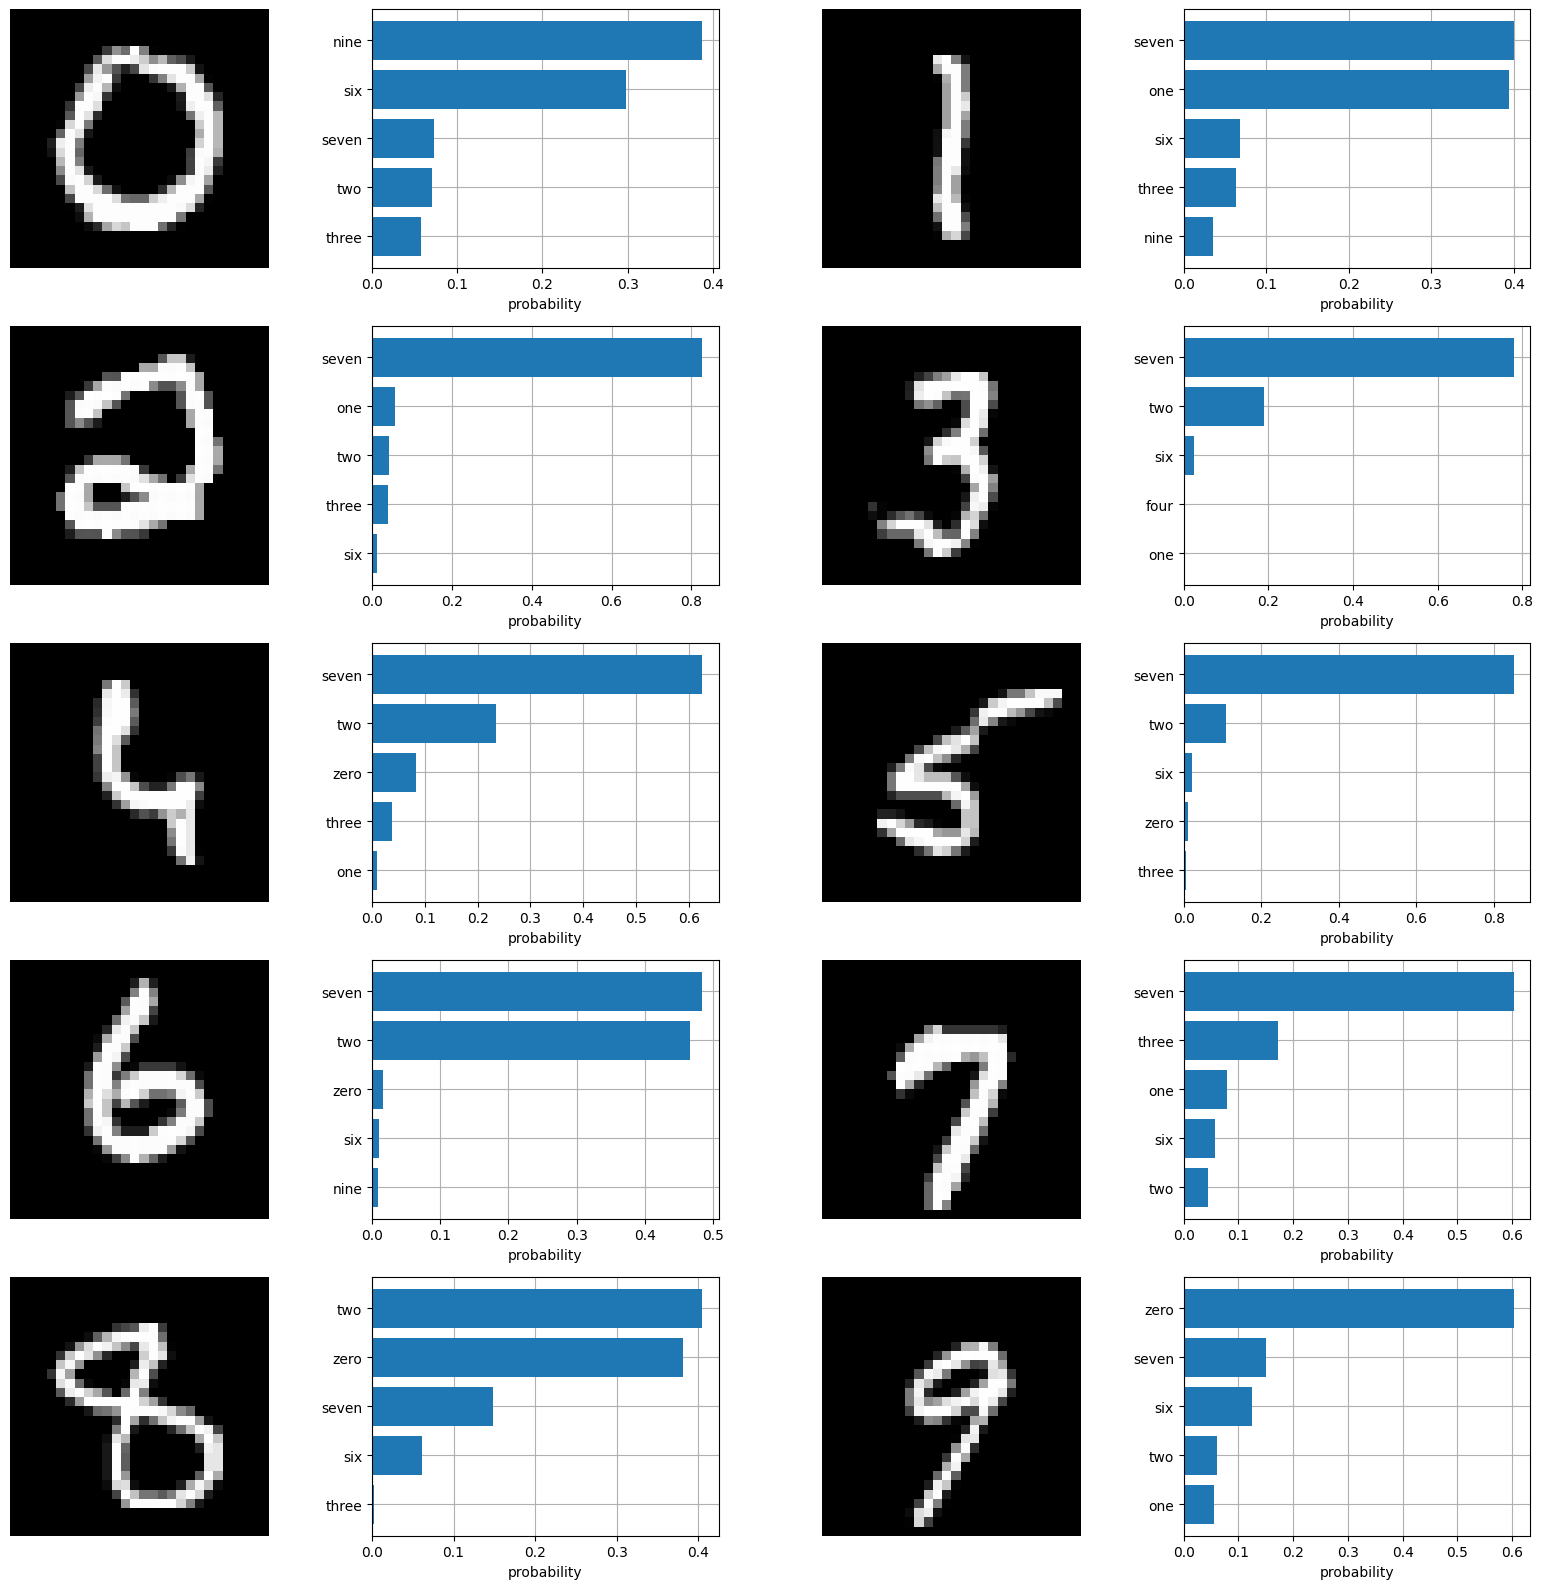

In [24]:
text_probs = clip_inference(model, gray_images, texts, probabilities=True)
top_probs, top_labels = text_probs.cpu().topk(5, dim=-1)
show_text_img_probs(original_gray_images, top_probs, top_labels, texts)

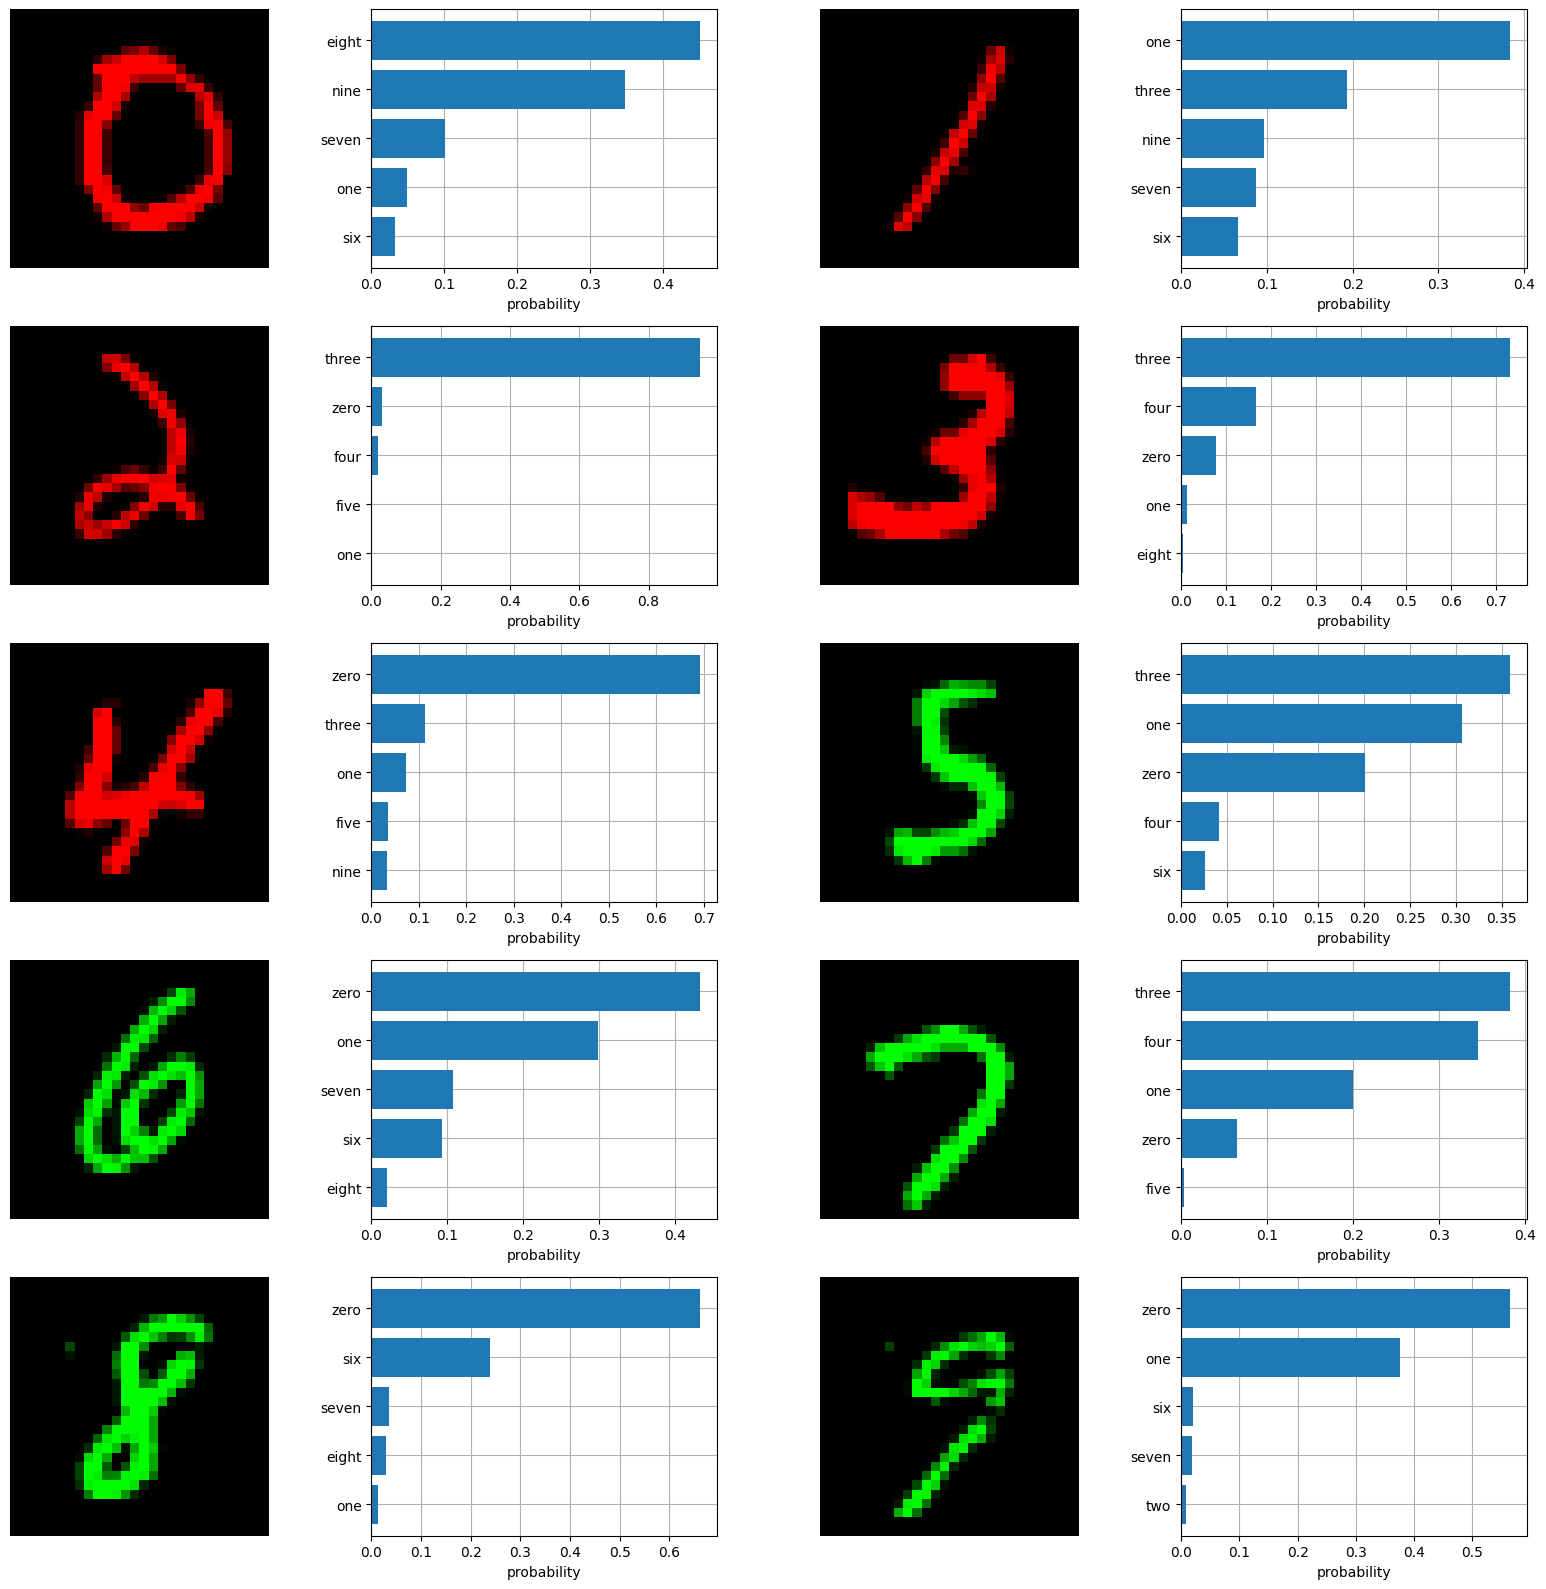

In [25]:
text_probs = clip_inference(model, color_images, texts, probabilities=True)
top_probs, top_labels = text_probs.cpu().topk(5, dim=-1)
show_text_img_probs(original_color_images, top_probs, top_labels, texts)